In [1]:
# import dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load in the files
wine_df = pd.read_csv('Resources/winequality_cleaned.csv')

In [43]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 73.23%


In [44]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63       610
           1       0.77      0.81      0.79      1015

    accuracy                           0.73      1625
   macro avg       0.71      0.71      0.71      1625
weighted avg       0.73      0.73      0.73      1625



TN:  371
FN:  196
TP:  819
FP:  239


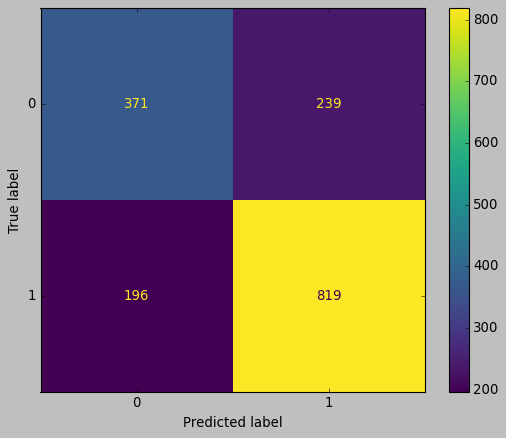

In [45]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Testing if data is loaded in and showing the first 5 on the list
print("Successfully Imported Data!")
wine_df.head()

Successfully Imported Data!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
#Showing the size and last 5 wines on the list 
print(wine_df.shape)
wine_df.tail()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [5]:
# display of columns 
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

## Decription 

In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
# count of each quality of wine 
wine_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

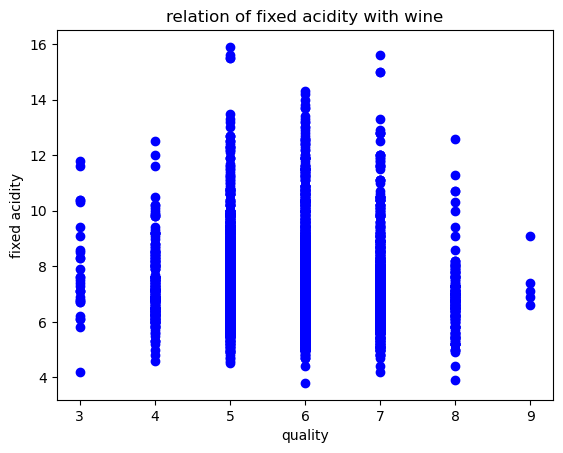

In [10]:
plt.scatter(wine_df['quality'], wine_df['fixed acidity'], color = 'blue')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()

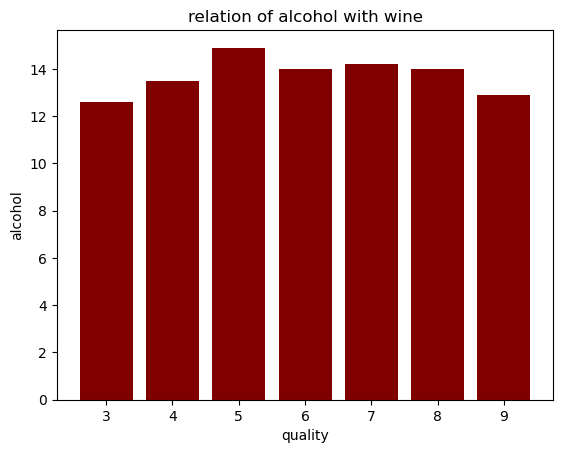

In [11]:
# checking the variation of fixed acidity in the different qualities of wine

plt.bar(wine_df['quality'], wine_df['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [35]:
# get the median amount of alcohol content
median_alcohol_amt = wine_df["alcohol"].mean()
print("Median Alcohol Amount: ", median_alcohol_amt)

Median Alcohol Amount:  10.491800831149453


In [18]:
# converting the response variables(3-9) as binary response variables that is either good or bad 
wine_df['quality'] = wine_df['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good', 9: 'good'})

In [19]:
# analyzing the different values present in the quality column
wine_df['quality'].value_counts()

good    4113
bad     2384
Name: quality, dtype: int64

<Axes: title={'center': 'Correlation with quality'}>

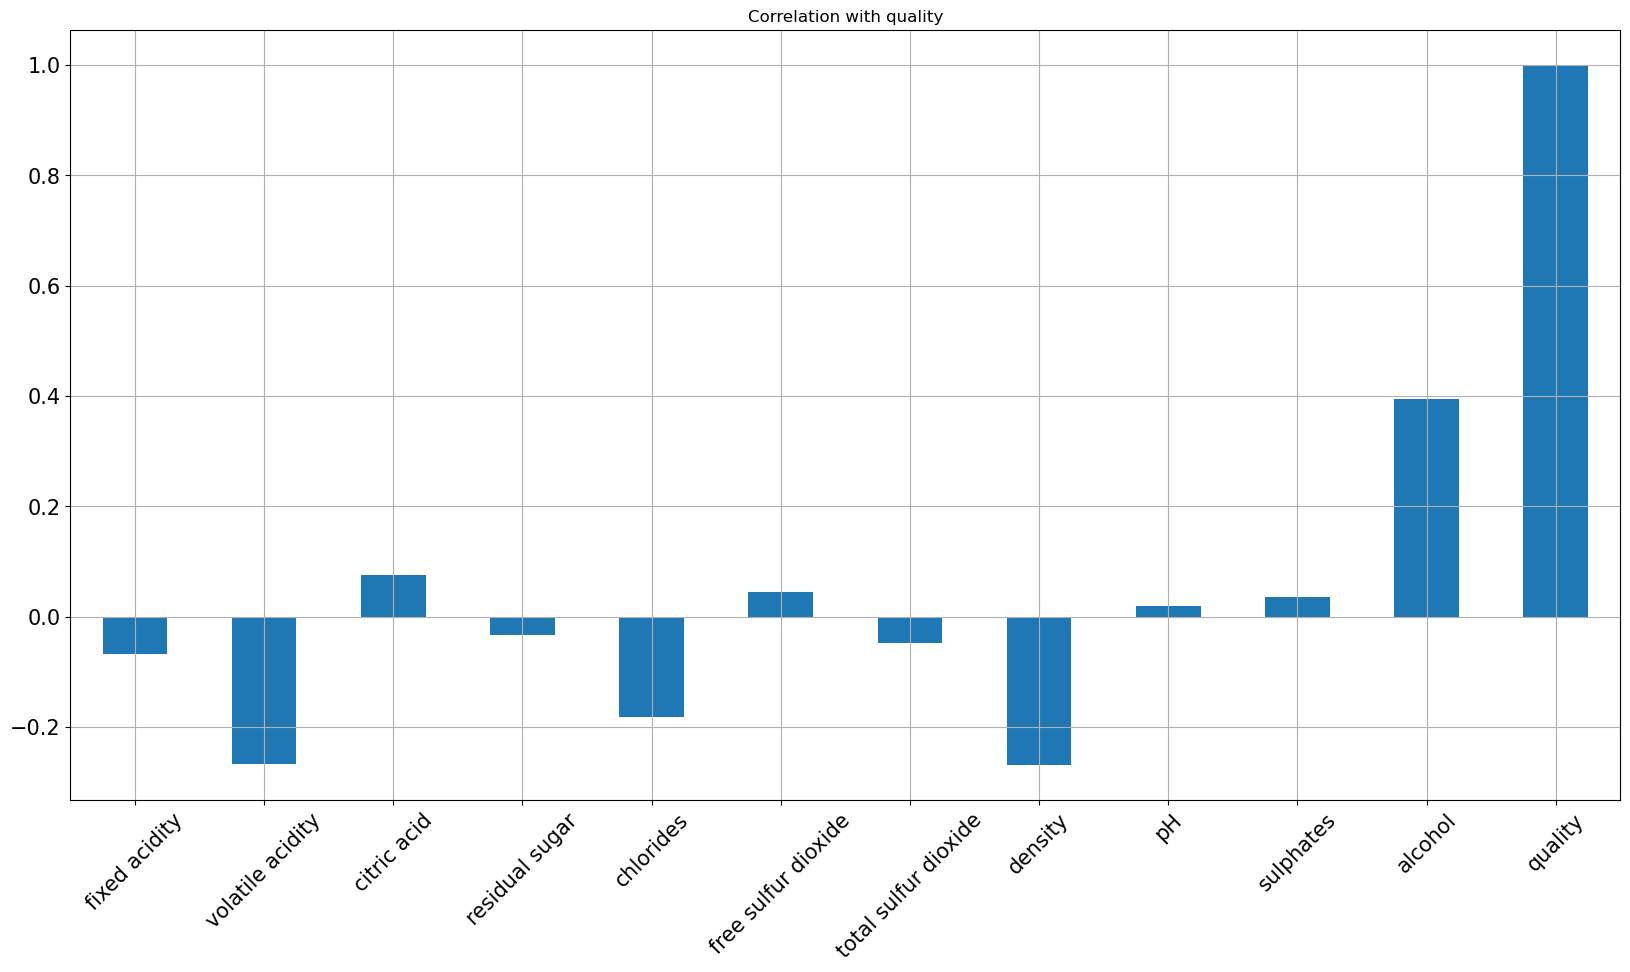

In [28]:
#Correlation with Quality with respect to attributes
wine_df.corrwith(wine_df.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

wine_df['quality'] = le.fit_transform(wine_df['quality'])

wine_df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
6492    1
6493    0
6494    1
6495    1
6496    1
Name: quality, Length: 6497, dtype: int64>

In [21]:
# dividing the dataset into dependent and independent variables

X = wine_df.iloc[:,:11]
y = wine_df.iloc[:,11]

# determining the shape of x and y.
print(X.shape)
print(y.shape)

(6497, 11)
(6497,)


In [22]:
# dividing the dataset in training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
     

(4872, 11)
(4872,)
(1625, 11)
(1625,)


In [23]:
# standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.7427692307692307


In [25]:
# classification report
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       610
           1       0.79      0.80      0.80      1015

    accuracy                           0.74      1625
   macro avg       0.73      0.72      0.72      1625
weighted avg       0.74      0.74      0.74      1625

[[392 218]
 [200 815]]


In [26]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.8233846153846154


In [30]:
features_label = wine_df.columns[:11]

In [31]:
#Fitting Random Forest Classification to the Training set

classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) fixed acidity                  0.147706
 2) volatile acidity               0.109127
 3) citric acid                    0.105959
 4) residual sugar                 0.086468
 5) chlorides                      0.086466
 6) free sulfur dioxide            0.083428
 7) total sulfur dioxide           0.081597
 8) density                        0.078846
 9) pH                             0.078314
10) sulphates                      0.073933
11) alcohol                        0.068155


In [46]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 81.85%


In [47]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.74       610
           1       0.83      0.89      0.86      1015

    accuracy                           0.82      1625
   macro avg       0.81      0.79      0.80      1625
weighted avg       0.82      0.82      0.82      1625



TN:  424
FN:  109
TP:  906
FP:  186


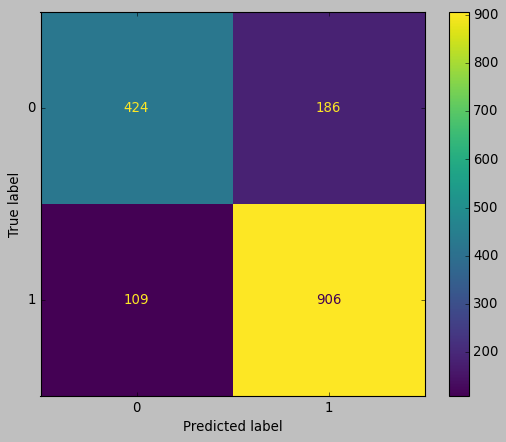

In [48]:
style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=rforest.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

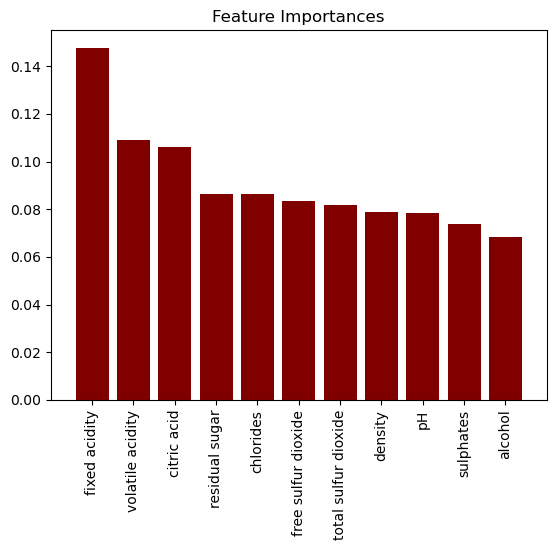

In [34]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="maroon", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
